In [5]:
import numpy as np
import matplotlib.pyplot as plt


def initialize_population(population_size, matrix_size):
    return np.random.choice([0, 1], size=(population_size, matrix_size))

def fitness(p, matrix, row_sums, col_sums, section):
    masked_matrix = matrix*p
    num_rows = num_col = len(row_sums)

    # Calculate row sums directly from the vector
    current_row_sum = [sum(masked_matrix[i * num_col + j] for j in range(num_col)) for i in range(num_rows)]
    correct_rows = sum(1 for actual_sum, optimal_sum in zip(current_row_sum, row_sums) if actual_sum == optimal_sum)

    # Calculate column sums directly from the vector
    current_col_sum = [sum(masked_matrix[i * num_col + j]  for i in range(num_rows)) for j in range(num_col)]
    correct_columns = sum(1 for actual_sum, optimal_sum in zip(current_col_sum, col_sums) if actual_sum == optimal_sum)

    if section == 'a':
        return (correct_rows+correct_columns) == num_col+num_rows
    else:
        #section b
        return correct_rows + correct_columns
    

def select_parents_indices(population, prob_distribution):
    if prob_distribution is None:
        # Uniform distribution
        selected_indices = np.random.choice(len(population), size=2)
    else:
        selected_indices = np.random.choice(len(population), size=2, p=prob_distribution)
    return selected_indices

def crossover(parent1, parent2, crossover_rate):
    if np.random.rand() < crossover_rate:
        crossover_point = np.random.randint(1,len(parent1))
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        return child1, child2
    else:
        return parent1, parent2

def mutate(child, mutation_rate):
    for i in range(len(child)):
        if np.random.rand() < mutation_rate:
            child[i] = 1-child[i]
    return child

def solution_found(fitness_scores, population, rows_plus_columns, section):
    max_fitness = max(fitness_scores)
    if section == 'a':
        #section a
        if max_fitness == 1: return population[fitness_scores.index(max_fitness)]
    else:
        #section b
        if max_fitness == rows_plus_columns: return population[fitness_scores.index(max_fitness)]

    return None

def genetic_algorithm(matrix, row_sums, col_sums, section,population_size = 100, crossover_rate = 0.7, mutation_rate = 0.01):
    NUM_GENERATIONS = 5000

    population = initialize_population(population_size, len(matrix))

    for it in range(NUM_GENERATIONS):
        fitness_scores = [fitness(p, matrix, row_sums, col_sums, section) for p in population]

        result = solution_found(fitness_scores, population, len(row_sums)*2, section)
        if result is not None: return result,it

        sum_fitness_scores = np.sum(fitness_scores)
        if sum_fitness_scores != 0: selection_prob = fitness_scores / sum_fitness_scores
        else: selection_prob = None

        new_population = []
        for _ in range(int(population_size/2)):
            index1, index2 = select_parents_indices(population, selection_prob)
            child1, child2 = crossover(population[index1], population[index2], crossover_rate)
            new_population.append(mutate(child1, mutation_rate))
            new_population.append(mutate(child2, mutation_rate))
        population = new_population
        
    return None,it



def game_generator(dim):
    initial_matrix = np.random.randint(1,10, size = dim*dim)
    #print("Initial Matrix: ")
    #for i in range(0, dim*dim, dim):
    #    print(initial_matrix[i:i+dim])
    matrix = initial_matrix.copy()
    for i in range(len(matrix)):
        if(np.random.rand() < 1/3):
            matrix[i] = 0
    
    current_row_sum = [sum(matrix[i * dim + j] for j in range(dim)) for i in range(dim)]
    #print("Rows should sum: ",current_row_sum)
    current_col_sum = [sum(matrix[i * dim + j]  for i in range(dim)) for j in range(dim)]
    #print("Columns should sum: ",current_col_sum)
    return initial_matrix, current_row_sum, current_col_sum

def plot_iterations_vs_dimensions(n, iterations, section):
    if section == 'a':
        plt.boxplot(iterations, positions = n)
        plt.title(f'Simple fitness function (log scale)')
    if section == 'b':
        plt.boxplot(iterations,  positions = n)
        plt.title(f'Advanced fitness function (log scale)')
    plt.xlabel('Matrix Size NxN (N)')
    plt.ylabel('Generations')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()




In [ ]:

MAX_N = 8
SAMPLE = 20
iterations_a = []
iterations_b = []

for n in range(3, MAX_N+1):
    #print("___DIM___: ", n)
    result_dim_a = []
    result_dim_b = []
    for _ in range(SAMPLE):
        matrix, row_sums, col_sums = game_generator(n)
        
        #if n > 5, the basic fitness function doesn't find a solution
        if (n <= 5):
            #print("_______Simple fitness function:_______")
            result_a, it_a = genetic_algorithm(matrix, row_sums, col_sums, 'a')
            result_dim_a.append(it_a)
            #print("Best Solution: ", result_a, "Iterations: ", it_a)

        #print("_______Advanced fitness function:_______")
        result_b, it_b = genetic_algorithm(matrix, row_sums, col_sums, 'b')
        result_dim_b.append(it_b)
        #print("Best Solution: ", result_b, "Iterations: ", it_b)
    
    #if n > 5, the basic fitness function doesn't find a solution
    if n <= 5: iterations_a.append(result_dim_a)
    iterations_b.append(result_dim_b)

plot_iterations_vs_dimensions(range(3, 6), iterations_a, 'a')
plot_iterations_vs_dimensions(range(3, MAX_N+1), iterations_b, 'b')

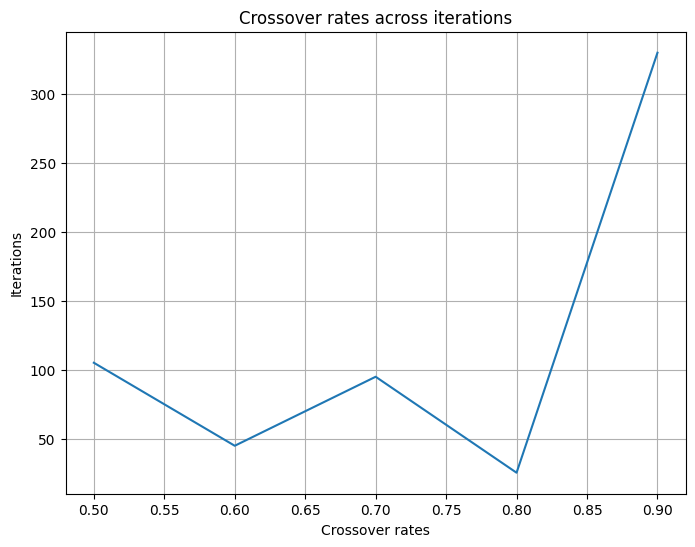

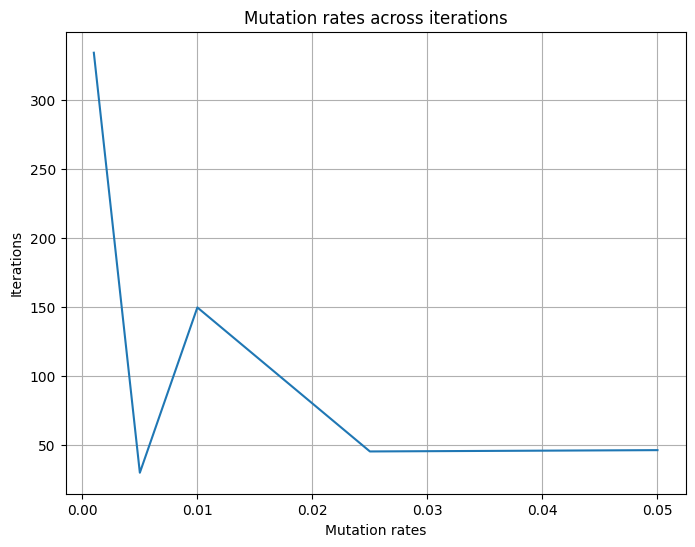

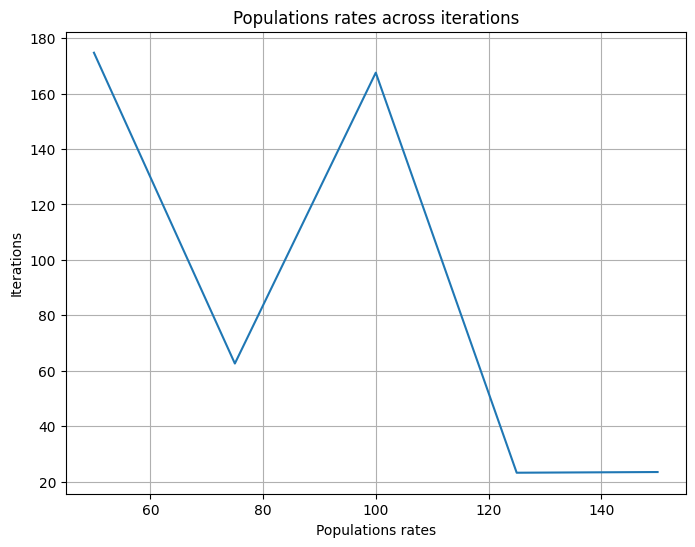

In [3]:
DIM = 5
SAMPLE = 20
CROSSOVER_RATES = [0.5,0.6,0.7,0.8,0.9]
MUTATION_RATES = [0.001,0.005,0.01,0.025,0.05]
POPULATIONS = [50,75,100,125,150]


sum_rates = []
plt.figure(figsize=(8, 6))
for elem in CROSSOVER_RATES:
    sum_res = 0
    for i in range(SAMPLE):
        matrix, row_sums, col_sums = game_generator(DIM)
        #print("_______Advanced fitness function:_______")
        result_b, it_b = genetic_algorithm(matrix, row_sums, col_sums, 'b', crossover_rate = elem)
        #print("Best Solution: ", result_b, "Iterations: ", it_b)
        sum_res += it_b
    sum_rates.append(sum_res/SAMPLE)

plt.plot(CROSSOVER_RATES, sum_rates)
plt.title(f'Crossover rates across iterations')
plt.xlabel('Crossover rates')
plt.ylabel('Iterations')
plt.grid(True)
plt.show()

sum_rates = []
plt.figure(figsize=(8, 6))
for elem in MUTATION_RATES:
    sum_res = 0
    for i in range(SAMPLE):
        matrix, row_sums, col_sums = game_generator(DIM)
        #print("_______Advanced fitness function:_______")
        result_b, it_b = genetic_algorithm(matrix, row_sums, col_sums, 'b', mutation_rate=elem)
        #print("Best Solution: ", result_b, "Iterations: ", it_b)
        sum_res += it_b
    sum_rates.append(sum_res/SAMPLE)

plt.plot(MUTATION_RATES, sum_rates)
plt.title(f'Mutation rates across iterations')
plt.xlabel('Mutation rates')
plt.ylabel('Iterations')
plt.grid(True)
plt.show()

sum_rates = []
plt.figure(figsize=(8, 6))
for elem in POPULATIONS:
    sum_res = 0
    for i in range(SAMPLE):
        matrix, row_sums, col_sums = game_generator(DIM)
        #print("_______Advanced fitness function:_______")
        result_b, it_b = genetic_algorithm(matrix, row_sums, col_sums, 'b', population_size= elem)
        #print("Best Solution: ", result_b, "Iterations: ", it_b)
        sum_res += it_b
    sum_rates.append(sum_res/SAMPLE)

plt.plot(POPULATIONS, sum_rates)
plt.title(f'Populations rates across iterations')
plt.xlabel('Populations rates')
plt.ylabel('Iterations')
plt.grid(True)
plt.show()

